# Sign Language Gesture Detection and Translation

*Objective* : To create a model that recognizes ASL Gestures and translate it to different languages using NLP

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import mediapipe as mp
import os
import time
import sklearn

In [2]:
tf.__version__

'2.11.1'

## Creating a Mediapipe model

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                 # image is no longer writable
    results = model.process(image)               # make prediction
    image.flags.writeable = True                  # image is now writable
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [3]:
def draw_landmarks(image, results):
    # Draw Face, Pose, Hand Connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              # dot color
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius= 1),
                              # line color
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1, circle_radius= 1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [66]:
mp_holistic.POSE_CONNECTIONS

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [54]:
mp_drawing.draw_landmarks??

In [6]:
cap = cv.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:

    while cap.isOpened():

        # Read feed
        ret , frame = cap.read()

        # Make detection
        image , results = mediapipe_detection(frame, holistic)
        
        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        cv.imshow('frame',image)
        
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [7]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [42]:
results.face_landmarks.landmark

[x: 0.61893296
y: 0.6676756
z: -0.03638506
, x: 0.6213534
y: 0.60521156
z: -0.060116086
, x: 0.6175695
y: 0.62572426
z: -0.033670295
, x: 0.60525465
y: 0.5550612
z: -0.04443327
, x: 0.6209811
y: 0.58829635
z: -0.06313078
, x: 0.61839634
y: 0.56783557
z: -0.057611506
, x: 0.610394
y: 0.5200263
z: -0.024076942
, x: 0.52023107
y: 0.52999496
z: 0.0037562745
, x: 0.6070923
y: 0.48107752
z: -0.014527562
, x: 0.6064959
y: 0.4583913
z: -0.015074476
, x: 0.6002444
y: 0.38615596
z: 0.0022724546
, x: 0.61905897
y: 0.6760984
z: -0.03502949
, x: 0.61847013
y: 0.68264776
z: -0.031393837
, x: 0.61751425
y: 0.6855637
z: -0.026475806
, x: 0.61778206
y: 0.6913852
z: -0.025185157
, x: 0.6183984
y: 0.6978649
z: -0.027457451
, x: 0.6188128
y: 0.70653564
z: -0.030336149
, x: 0.61885923
y: 0.7164303
z: -0.029541561
, x: 0.617891
y: 0.73460823
z: -0.020435315
, x: 0.6203972
y: 0.61462694
z: -0.054890987
, x: 0.6069207
y: 0.6158552
z: -0.0416929
, x: 0.4586782
y: 0.4760896
z: 0.053699125
, x: 0.5551479
y: 0.53

In [43]:
len(results.face_landmarks.landmark)

468

In [51]:
len(results.left_hand_landmarks.landmark)

21

In [114]:
frame

array([[[160, 174, 172],
        [162, 175, 173],
        [162, 173, 172],
        ...,
        [132, 128, 133],
        [131, 128, 133],
        [131, 128, 133]],

       [[158, 173, 171],
        [159, 172, 170],
        [160, 172, 170],
        ...,
        [133, 129, 135],
        [132, 129, 135],
        [132, 129, 135]],

       [[156, 170, 167],
        [157, 171, 167],
        [158, 171, 166],
        ...,
        [132, 128, 137],
        [131, 128, 137],
        [131, 128, 137]],

       ...,

       [[112, 115, 105],
        [111, 115, 100],
        [111, 116,  96],
        ...,
        [ 60,  72,  78],
        [ 58,  71,  76],
        [ 58,  71,  76]],

       [[110, 117, 101],
        [109, 117,  96],
        [110, 117,  93],
        ...,
        [ 60,  72,  77],
        [ 58,  71,  75],
        [ 58,  71,  75]],

       [[108, 116,  97],
        [107, 116,  94],
        [107, 115,  90],
        ...,
        [ 60,  72,  77],
        [ 58,  71,  75],
        [ 60,  72,  76]]

In [8]:
draw_styled_landmarks(frame, results)

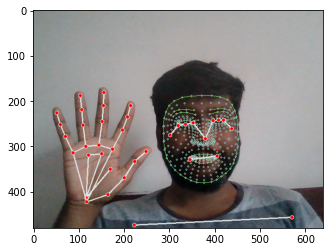

In [9]:
plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))

## Extract Keypoint Values

In [10]:
print(results.pose_landmarks.landmark[-1].x,
results.pose_landmarks.landmark[-1].y,
results.pose_landmarks.landmark[-1].z,
results.pose_landmarks.landmark[-1].visibility)

0.5365008115768433 3.896435022354126 0.16470667719841003 9.996267908718437e-05


In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
test

array([5.36500812e-01, 3.89643502e+00, 1.64706677e-01, 9.99626791e-05])

In [94]:
pose

[array([ 0.55642539,  0.63911176, -1.35634136,  0.99646646]),
 array([ 0.58973265,  0.56161422, -1.27979255,  0.99488777]),
 array([ 0.61081851,  0.56227458, -1.28024471,  0.99521858]),
 array([ 0.63011342,  0.56309956, -1.2804389 ,  0.9940176 ]),
 array([ 0.52233124,  0.55934542, -1.28766608,  0.99545842]),
 array([ 0.50194156,  0.55752093, -1.28714299,  0.99622309]),
 array([ 0.48206171,  0.55735856, -1.28766942,  0.99631649]),
 array([ 0.66129124,  0.58209521, -0.69082886,  0.99594164]),
 array([ 0.45965338,  0.58675867, -0.70186532,  0.9972949 ]),
 array([ 0.59995443,  0.71537775, -1.12498295,  0.9948656 ]),
 array([ 0.51303065,  0.71469218, -1.12976539,  0.99546248]),
 array([ 0.85703868,  0.91552722, -0.31871626,  0.91642815]),
 array([ 0.32046863,  0.92614025, -0.38959056,  0.95389378]),
 array([ 1.00461555,  1.24268091, -0.5952422 ,  0.10974292]),
 array([ 0.24262711,  1.34333181, -0.6388647 ,  0.19985835]),
 array([ 0.85231447,  1.36554646, -1.1429044 ,  0.16047089]),
 array([

In [134]:
len(results.pose_landmarks.landmark)

33

In [133]:
len(pose) # 33 * 4 (x,y,z,visibility)

132

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else zp.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else zp.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [17]:
extract_keypoints(results)

array([ 0.5938462 ,  0.59063053, -1.19848037, ...,  0.08222418,
        0.47262818, -0.08600131])

In [18]:
print(f"pose : {pose.shape}\nface : {face.shape}\nleft hand : {lh.shape}\nright hand : {rh.shape}")

pose : (132,)
face : (1404,)
left hand : (63,)
right hand : (63,)


In [19]:
extract_keypoints(results).shape

(1662,)

## Setup Folders for Collection

In [23]:
path = '\DataSet_sign_language\data'
features = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

## Training and Testing